In [90]:
library(ltm)
library(MASS)
library(msm)
library(dplyr)
library(ggplot2)
library(polycor)
library(mvtnorm)
library(resample)

In [51]:
data(LSAT)

In [59]:
tail(LSAT)

,Item 1,Item 2,Item 3,Item 4,Item 5
,<int>,<int>,<int>,<int>,<int>
995,1,1,1,1,1
996,1,1,1,1,1
997,1,1,1,1,1
998,1,1,1,1,1
999,1,1,1,1,1
1000,1,1,1,1,1


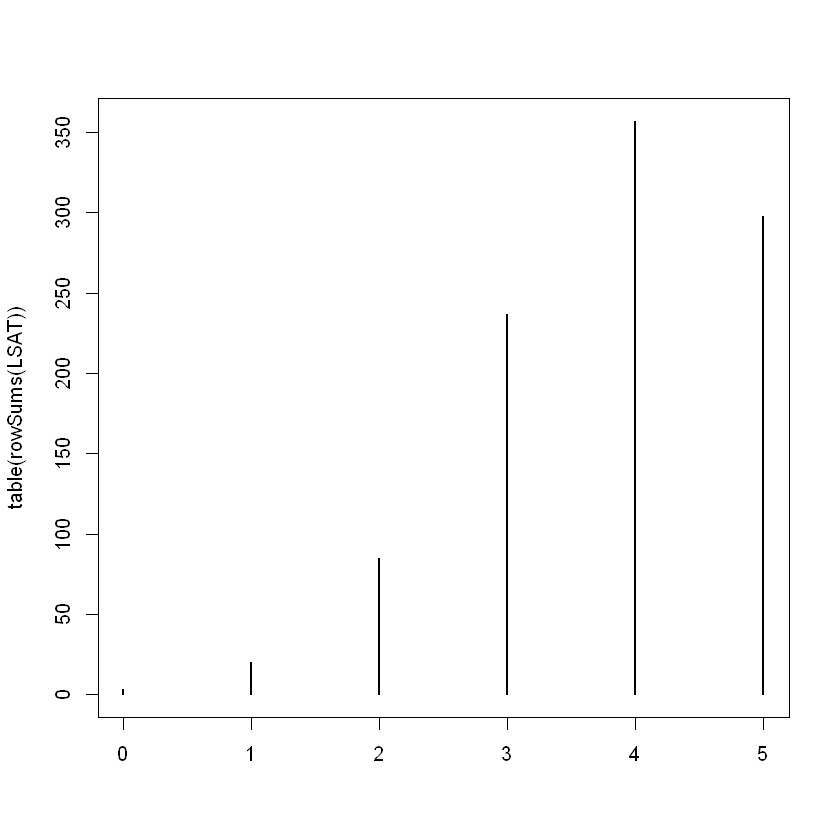

In [62]:
plot(table(rowSums(LSAT)))

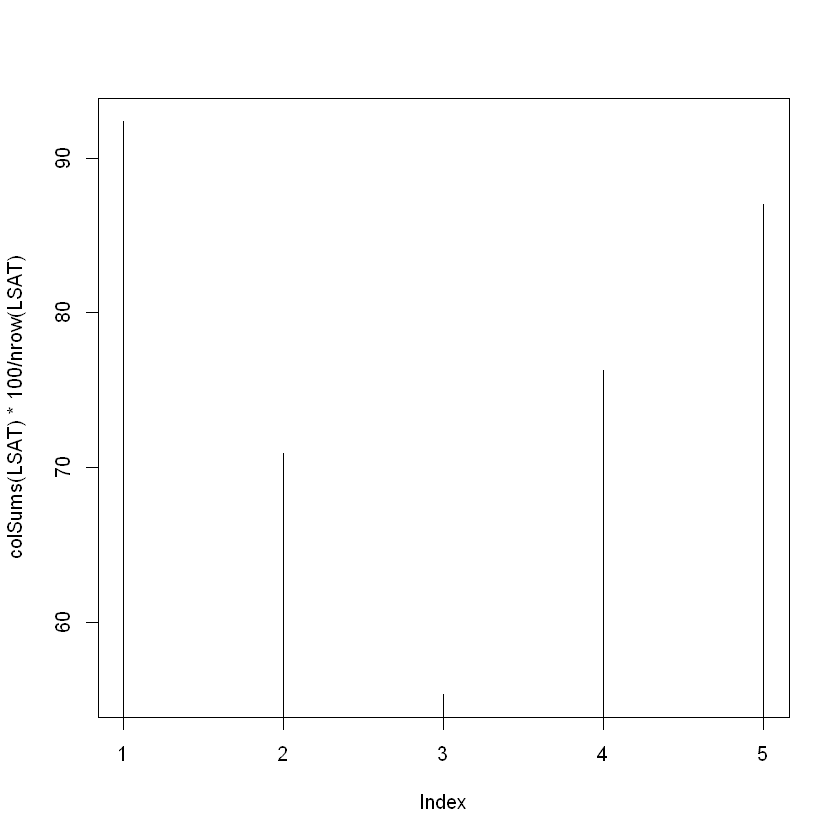

In [65]:
plot(colSums(LSAT)*100/nrow(LSAT), type='h')

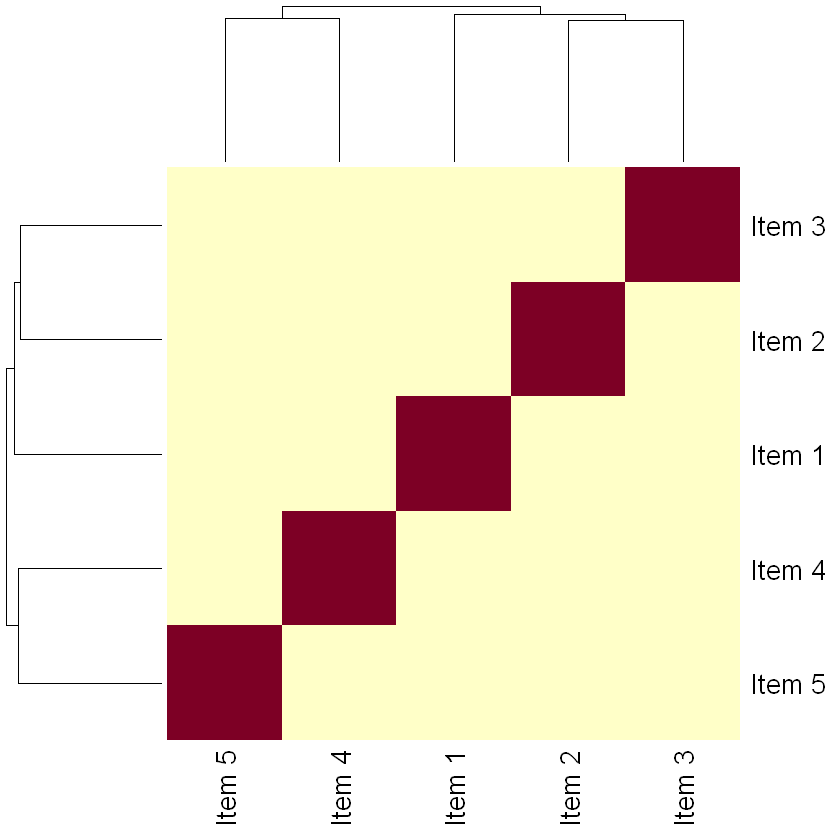

In [75]:
heatmap(cor(LSAT))

In [77]:
round(cor(LSAT),2)

,Item 1,Item 2,Item 3,Item 4,Item 5
Item 1,1.00,0.07,0.10,0.04,0.02
Item 2,0.07,1.00,0.11,0.06,0.09
Item 3,0.10,0.11,1.00,0.11,0.05
Item 4,0.04,0.06,0.11,1.00,0.10
Item 5,0.02,0.09,0.05,0.10,1.00


In [6]:
names(LSAT)

[1] "Item 1" "Item 2" "Item 3" "Item 4" "Item 5"

In [7]:
dim(LSAT)

[1] 1000    5

In [8]:
summary(LSAT)

     Item 1          Item 2          Item 3          Item 4          Item 5    
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.00  
 1st Qu.:1.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:1.000   1st Qu.:1.00  
 Median :1.000   Median :1.000   Median :1.000   Median :1.000   Median :1.00  
 Mean   :0.924   Mean   :0.709   Mean   :0.553   Mean   :0.763   Mean   :0.87  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.00  
 Max.   :1.000   Max.   :1.000   Max.   :1.000   Max.   :1.000   Max.   :1.00  

In [10]:
glimpse(LSAT)

Rows: 1,000
Columns: 5
$ `Item 1` <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ `Item 2` <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ `Item 3` <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ `Item 4` <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ `Item 5` <int> 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…


In [94]:
round(colStdevs(LSAT)/colMeans(LSAT),2)

Item 1 Item 2 Item 3 Item 4 Item 5 
  0.29   0.64   0.90   0.56   0.39

# IRT Models:

The item response theory (IRT), also known as the latent response theory refers to a family of mathematical models that attempt to explain the relationship between latent traits (unobservable characteristic or attribute) and their manifestations (i.e. observed outcomes, responses or performance). They establish a link between the properties of items on an instrument, individuals responding to these items and the underlying trait being measured. IRT assumes that the latent construct (e.g. stress, knowledge, attitudes) and items of a measure are organized in an unobservable continuum. Therefore, its main purpose focuses on establishing the individual’s position on that continuum.

In [98]:
?ltm

Fit a latent trait model under the Item Response Theory (IRT) approach.

$$
\log\left(\frac{\pi_{i}}{1-\pi_{i}}\right)=\beta_{0i} + \beta_{1i}z_1 + 
    \beta_{2i}z_2
$$

where$ \pi_i $is the the probability of a positive response in the ith item, $ \beta_{i0}$ is the easiness parameter, $\beta_{ij} $ (j=1,2) are the discrimination parameters and z_1, z_2 denote the two latent variables.

The usual form of the latent trait model assumes linear latent variable effects (Bartholomew and Knott, 1999; Moustaki and Knott, 2000). ltm() fits the linear one- and two-factor models but also provides extensions described by Rizopoulos and Moustaki (2006) to include nonlinear latent variable effects. These are incorporated in the linear predictor of the model, i.e.,

$$ \log\left
    (\frac{\pi_{i}}{1-\pi_{i}}\right)=\beta_{0i} + \beta_{1i}z_1 + \beta_{2i}z_2 + \beta_{nl}^tf(z_1, z_2), $$
    

where f(z_1, z_2) is a function of z_1 and z_2 (e.g., f(z_1, z_2) = z_1z_2, f(z_1, z_2) = z_1^2, etc.) and \beta_{nl} is a matrix of nonlinear terms parameters (look also at the Examples).

If IRT.param = TRUE, then the parameters estimates for the two-parameter logistic model (i.e., the model with one factor) are reported under the usual IRT parameterization, i.e.,

$$ \log\left(\frac{\pi_i}{1-\pi_i}\right) = \beta_{1i} (z - \beta_{0i}^*). $$

The linear two-factor model is unidentified under orthogonal rotations on the factors' space. To achieve identifiability you can fix the value of one loading using the constraint argument.

The parameters are estimated by maximizing the approximate marginal log-likelihood under the conditional independence assumption, i.e., conditionally on the latent structure the items are independent Bernoulli variates under the logit link. The required integrals are approximated using the Gauss-Hermite rule. The optimization procedure used is a hybrid algorithm. The procedure initially uses a moderate number of EM iterations (see control argument iter.em) and then switches to quasi-Newton (see control arguments method and iter.qN) iterations until convergence.

### 2PL MODEL

In [12]:
IRTmodel = ltm(LSAT ~ z1,IRT.param = TRUE)
IRTmodel


Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Coefficients:
        Dffclt  Dscrmn
Item 1  -3.360   0.825
Item 2  -1.370   0.723
Item 3  -0.280   0.890
Item 4  -1.866   0.689
Item 5  -3.124   0.657

Log.Lik: -2466.653


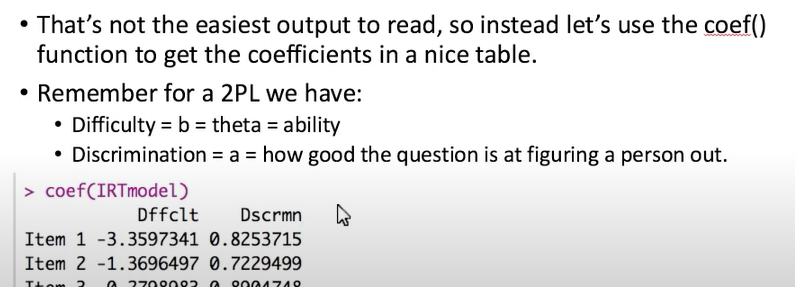

Dffclt <- 0 (EASY)

Dscrm <- 1 (Not excellent discriminator)

In [14]:
summary(IRTmodel)
#IRTmodel[["coefficients"]]


Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Model Summary:
   log.Lik      AIC      BIC
 -2466.653 4953.307 5002.384

Coefficients:
                value std.err  z.vals
Dffclt.Item 1 -3.3597  0.8669 -3.8754
Dffclt.Item 2 -1.3696  0.3073 -4.4565
Dffclt.Item 3 -0.2799  0.0997 -2.8083
Dffclt.Item 4 -1.8659  0.4341 -4.2982
Dffclt.Item 5 -3.1236  0.8700 -3.5904
Dscrmn.Item 1  0.8254  0.2581  3.1983
Dscrmn.Item 2  0.7229  0.1867  3.8721
Dscrmn.Item 3  0.8905  0.2326  3.8281
Dscrmn.Item 4  0.6886  0.1852  3.7186
Dscrmn.Item 5  0.6575  0.2100  3.1306

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.024 
quasi-Newton: BFGS 


In [100]:
coef(IRTmodel)

,Dffclt,Dscrmn
Item 1,-3.3597341,0.8253715
Item 2,-1.3696497,0.7229499
Item 3,-0.2798983,0.8904748
Item 4,-1.8659189,0.6885502
Item 5,-3.1235725,0.6574516


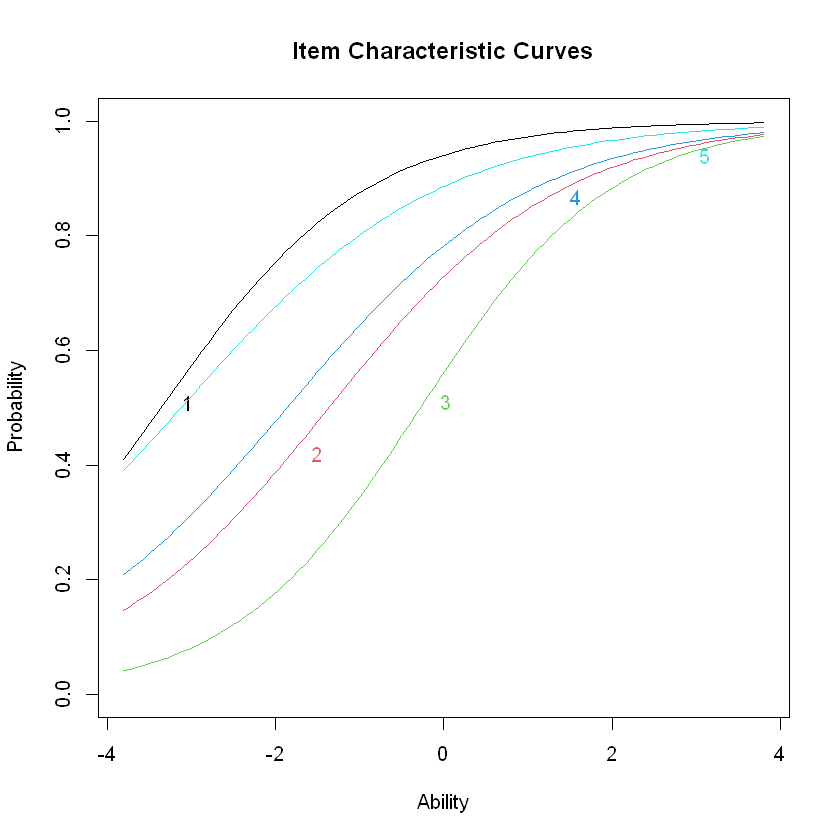

In [101]:
plot(IRTmodel, type = "ICC")

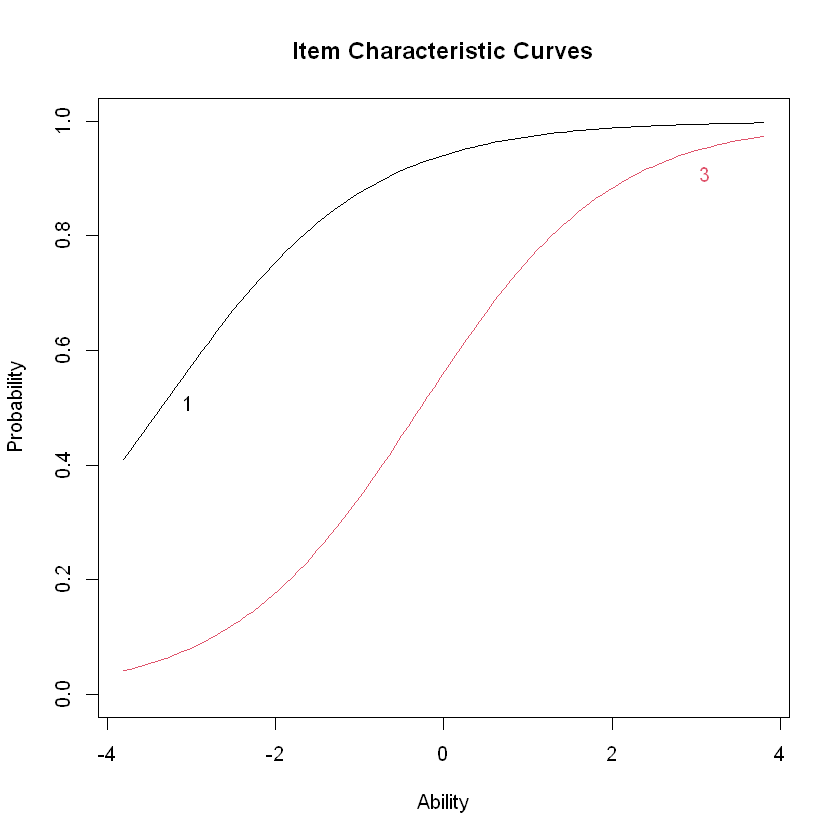

In [118]:
plot(IRTmodel, type = "ICC", items =c(1,3))

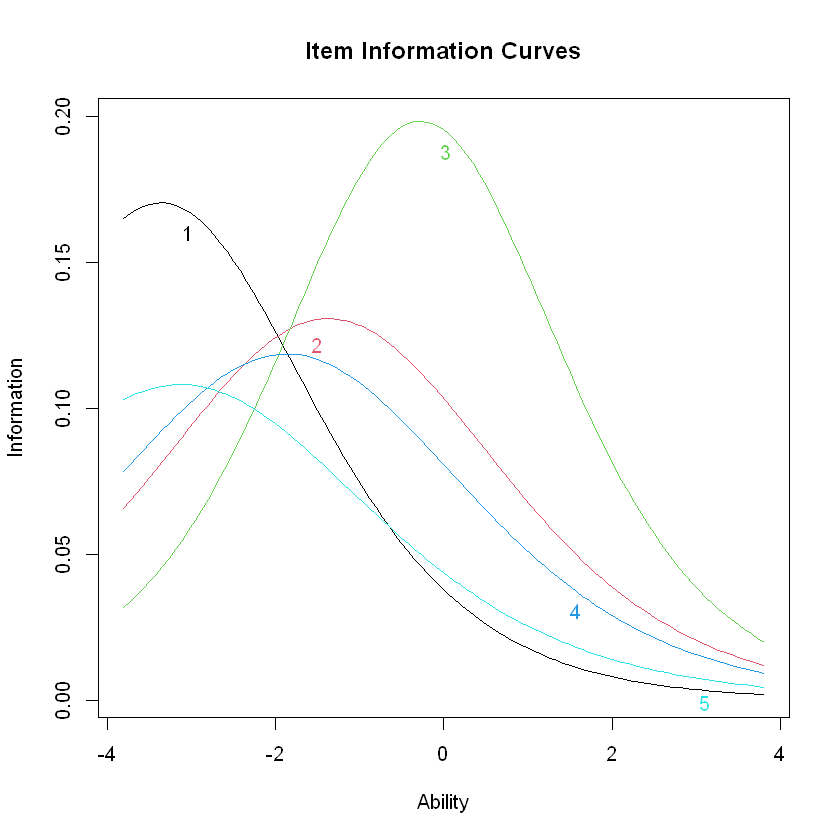

In [102]:
plot(IRTmodel, type = "IIC")

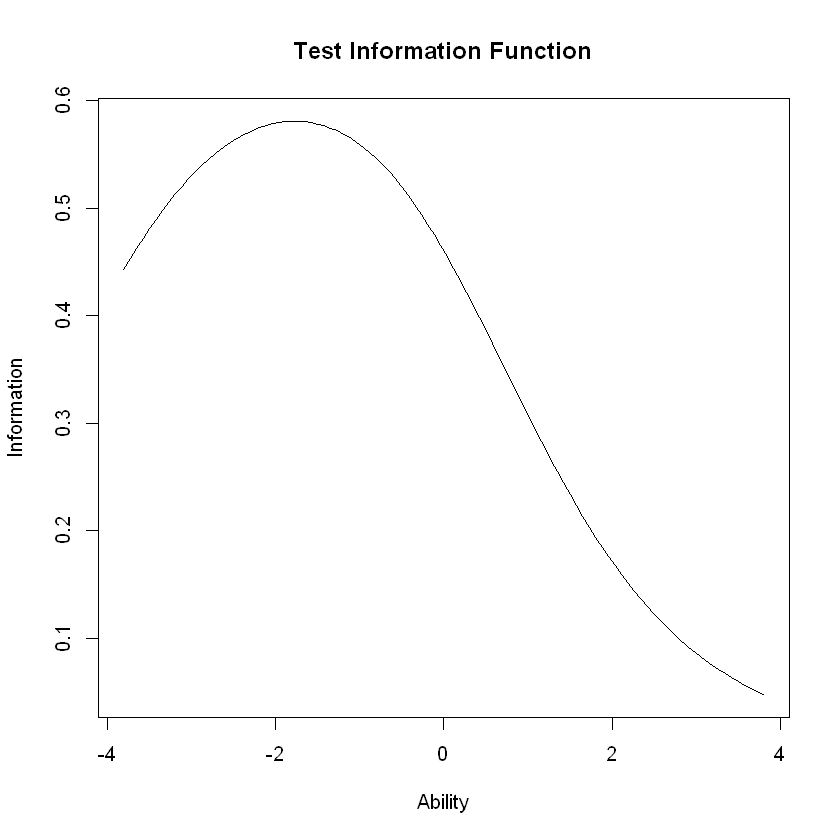

In [126]:
plot(IRTmodel, type = "IIC", items =c(0))

It tells you where the most information abou tparticipant, centered around -2, low score and not very low score 

In [127]:
factor.scores(IRTmodel)
## **reult will have z1 = expected ability score 


Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Scoring Method: Empirical Bayes

Factor-Scores for observed response patterns:
   Item 1 Item 2 Item 3 Item 4 Item 5 Obs     Exp     z1 se.z1
1       0      0      0      0      0   3   2.277 -1.895 0.795
2       0      0      0      0      1   6   5.861 -1.479 0.796
3       0      0      0      1      0   2   2.596 -1.460 0.796
4       0      0      0      1      1  11   8.942 -1.041 0.800
5       0      0      1      0      0   1   0.696 -1.331 0.797
6       0      0      1      0      1   1   2.614 -0.911 0.802
7       0      0      1      1      0   3   1.179 -0.891 0.803
8       0      0      1      1      1   4   5.955 -0.463 0.812
9       0      1      0      0      0   1   1.840 -1.438 0.796
10      0      1      0      0      1   8   6.431 -1.019 0.801
11      0      1      0      1      1  16  13.577 -0.573 0.809
12      0      1      1      0      1   3   4.370 -0.441 0.813
13      0      1      1      1      0   2   2.000 -

In [128]:
person.fit(IRTmodel)


Person-Fit Statistics and P-values

Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Alternative: Inconsistent response pattern under the estimated model

   Item 1 Item 2 Item 3 Item 4 Item 5      L0      Lz Pr(<Lz)
1       0      0      0      0      0 -4.0633 -1.2085  0.1134
2       0      0      0      0      1 -3.8211 -0.9436  0.1727
3       0      0      0      1      0 -4.6645 -1.8837  0.0298
4       0      0      0      1      1 -3.9565 -1.1454   0.126
5       0      0      1      0      0 -6.1607 -3.5228  0.0002
6       0      0      1      0      1 -5.3157 -2.5662  0.0051
7       0      0      1      1      0 -6.1306 -3.4011  0.0003
8       0      0      1      1      1 -4.8129 -2.0687  0.0193
9       0      1      0      0      0 -5.0405 -2.3008  0.0107
10      0      1      0      0      1 -4.3092 -1.5185  0.0644
11      0      1      0      1      1 -3.9280 -1.2059  0.1139
12      0      1      1      0      1 -5.1333 -2.3723  0.0088
13      0      1      1      1      0

In [129]:
item.fit(IRTmodel)


Item-Fit Statistics and P-values

Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Alternative: Items do not fit the model
Ability Categories: 10

            X^2 Pr(>X^2)
Item 1 276.1857  <0.0001
Item 2 253.5272  <0.0001
Item 3 437.0737  <0.0001
Item 4 216.3252  <0.0001
Item 5 400.3201  <0.0001



# Rasch Models (optional ) 

In [17]:
model <- rasch(LSAT, IRT.param = TRUE)
summary(model)


Call:
rasch(data = LSAT, IRT.param = TRUE)

Model Summary:
   log.Lik      AIC      BIC
 -2466.938 4945.875 4975.322

Coefficients:
                value std.err   z.vals
Dffclt.Item 1 -3.6153  0.3266 -11.0680
Dffclt.Item 2 -1.3224  0.1422  -9.3009
Dffclt.Item 3 -0.3176  0.0977  -3.2518
Dffclt.Item 4 -1.7301  0.1691 -10.2290
Dffclt.Item 5 -2.7802  0.2510 -11.0743
Dscrmn         0.7551  0.0694  10.8757

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 2.9e-05 
quasi-Newton: BFGS 



In [18]:
coef(model)

,Dffclt,Dscrmn
Item 1,-3.6152665,0.7551347
Item 2,-1.3224208,0.7551347
Item 3,-0.3176306,0.7551347
Item 4,-1.7300903,0.7551347
Item 5,-2.7801716,0.7551347


In [109]:
GoF.rasch(model)


Bootstrap Goodness-of-Fit using Pearson chi-squared

Call:
rasch(data = LSAT, IRT.param = TRUE)

Tobs: 18.34 
# data-sets: 50 
p-value: 0.9 


In [111]:
#find the item difficulty level 
coef(model, prob = TRUE, order = TRUE)
coef(IRTmodel, prob = TRUE, order = TRUE)

,Dffclt,Dscrmn,P(x=1|z=0)
Item 1,-3.6152665,0.7551347,0.9387746
Item 5,-2.7801716,0.7551347,0.8908453
Item 4,-1.7300903,0.7551347,0.7869187
Item 2,-1.3224208,0.7551347,0.7307844
Item 3,-0.3176306,0.7551347,0.5596777


,Dffclt,Dscrmn,P(x=1|z=0)
Item 1,-3.3597341,0.8253715,0.9412008
Item 5,-3.1235725,0.6574516,0.8863106
Item 4,-1.8659189,0.6885502,0.7832621
Item 2,-1.3696497,0.7229499,0.7291251
Item 3,-0.2798983,0.8904748,0.5619900


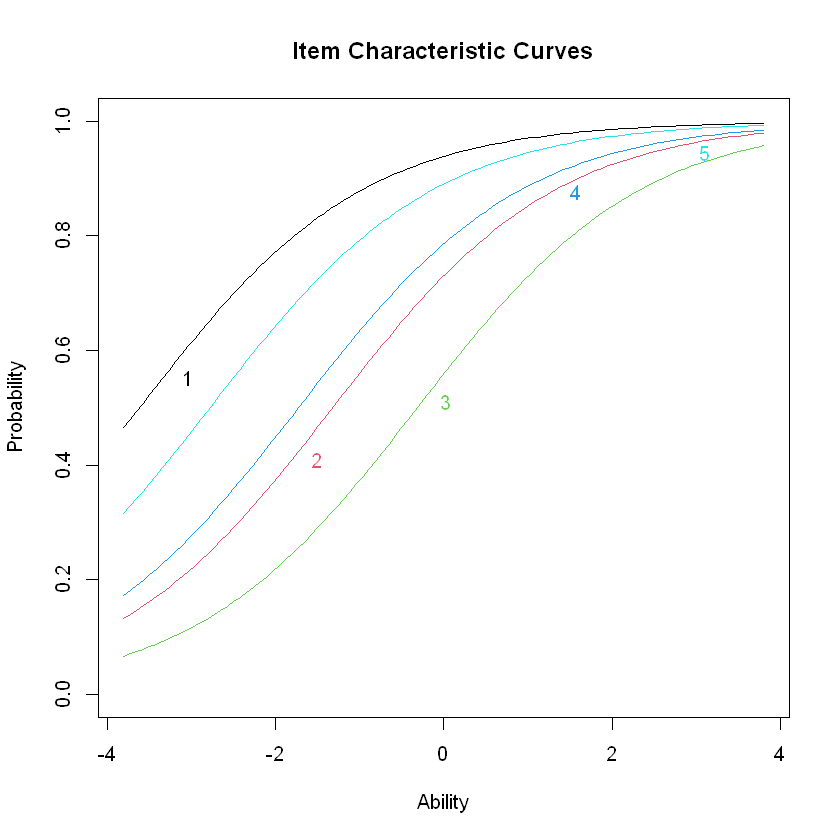

In [112]:
plot(model, type = "ICC")

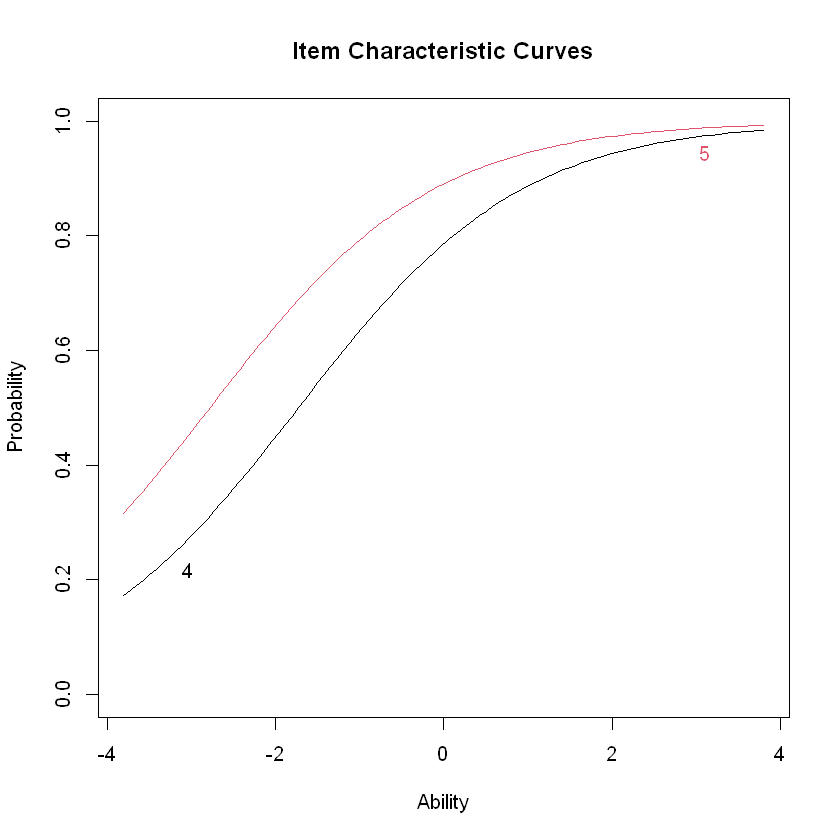

In [114]:
## 5.1 ) to show some items 
plot(model, type = "ICC", items =c(4,5))

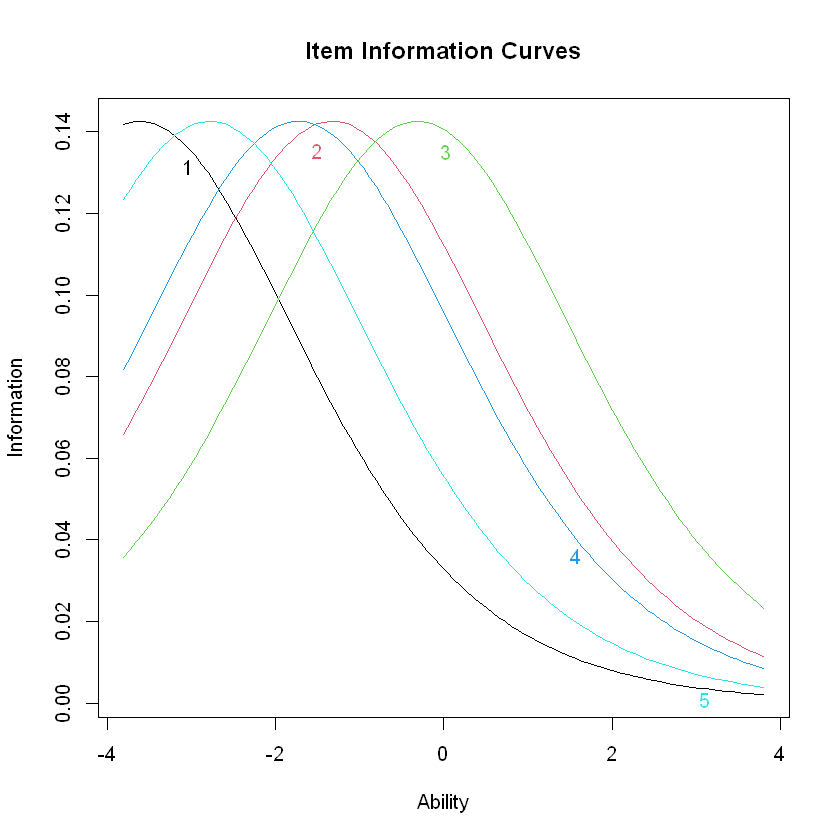

In [116]:
# 6 ) Plot the Item Information Curve (IIC) :
plot(model, type = "IIC")

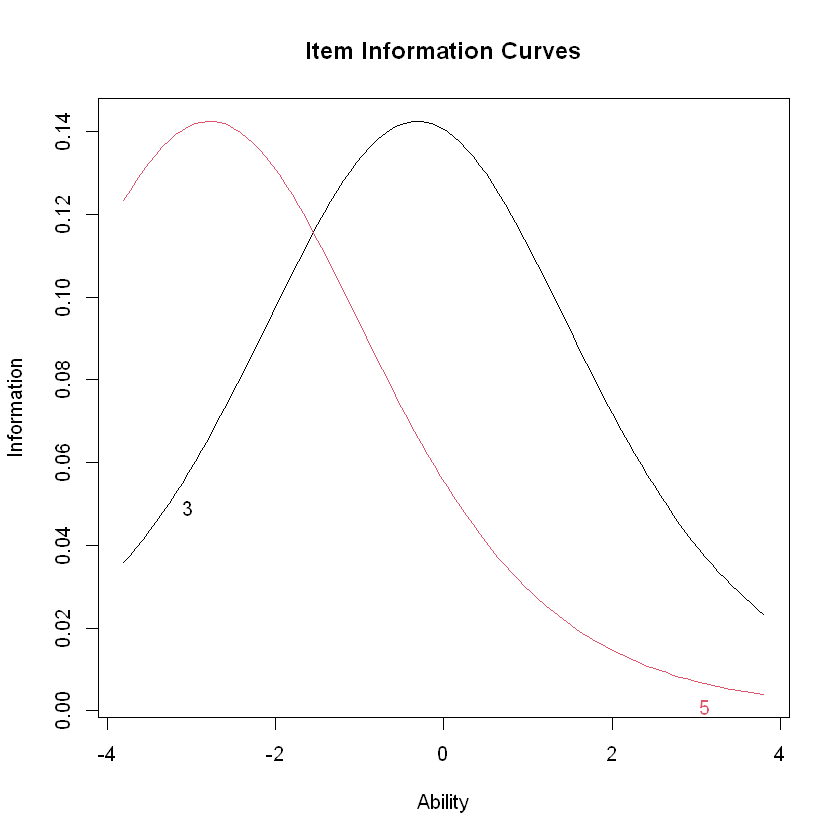

In [24]:
 ## 6.1 ) to show some items 
plot(model, type = "IIC", items =c(3,5))

In [117]:
# Test Information result summary 
information(model, c(-4, 4))
information(IRTmodel, c(-4, 4))


Call:
rasch(data = LSAT, IRT.param = TRUE)

Total Information = 3.76
Information in (-4, 4) = 2.93 (77.92%)
Based on all the items



Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Total Information = 3.77
Information in (-4, 4) = 2.93 (77.84%)
Based on all the items


In [28]:
#===========FACTORS SCORES (2PL  ) =====##

# 8 ) fatcore score for each response pattern (combination)
## the Z score is the ability estimate for each pattern = obs

  #A) Rasch model :

  # 8.1)  fatcore score is about the pattern of the data overall 
## also it will give you all sort of single combination for each response pattern
factor.scores(model)


Call:
rasch(data = LSAT, IRT.param = TRUE)

Scoring Method: Empirical Bayes

Factor-Scores for observed response patterns:
   Item 1 Item 2 Item 3 Item 4 Item 5 Obs     Exp     z1 se.z1
1       0      0      0      0      0   3   2.364 -1.910 0.790
2       0      0      0      0      1   6   5.468 -1.439 0.793
3       0      0      0      1      0   2   2.474 -1.439 0.793
4       0      0      0      1      1  11   8.249 -0.959 0.801
5       0      0      1      0      0   1   0.852 -1.439 0.793
6       0      0      1      0      1   1   2.839 -0.959 0.801
7       0      0      1      1      0   3   1.285 -0.959 0.801
8       0      0      1      1      1   4   6.222 -0.466 0.816
9       0      1      0      0      0   1   1.819 -1.439 0.793
10      0      1      0      0      1   8   6.063 -0.959 0.801
11      0      1      0      1      1  16  13.288 -0.466 0.816
12      0      1      1      0      1   3   4.574 -0.466 0.816
13      0      1      1      1      0   2   2.070 -0.466 

In [30]:
# 8.2) person  score is about the person pattern of the data and thier corresponding ability estimate  
## this is the refrence of the item 
person.fit(model)


Person-Fit Statistics and P-values

Call:
rasch(data = LSAT, IRT.param = TRUE)

Alternative: Inconsistent response pattern under the estimated model

   Item 1 Item 2 Item 3 Item 4 Item 5      L0      Lz Pr(<Lz)
1       0      0      0      0      0 -3.9914 -1.1186  0.1317
2       0      0      0      0      1 -3.9467 -1.0917  0.1375
3       0      0      0      1      0 -4.7396 -2.0187  0.0218
4       0      0      0      1      1 -4.1206 -1.3376  0.0905
5       0      0      1      0      0 -5.8062 -3.2656  0.0005
6       0      0      1      0      1 -5.1872 -2.4767  0.0066
7       0      0      1      1      0 -5.9802 -3.3235  0.0004
8       0      0      1      1      1 -4.7717 -2.0310  0.0211
9       0      1      0      0      0 -5.0475 -2.3786  0.0087
10      0      1      0      0      1 -4.4284 -1.6664  0.0478
11      0      1      0      1      1 -4.0129 -1.3093  0.0952
12      0      1      1      0      1 -5.0795 -2.3238  0.0101
13      0      1      1      1      0 -5.87

In [32]:
item.fit(model)


Item-Fit Statistics and P-values

Call:
rasch(data = LSAT, IRT.param = TRUE)

Alternative: Items do not fit the model
Ability Categories: 10

            X^2 Pr(>X^2)
Item 1  61.9294  <0.0001
Item 2 159.0100  <0.0001
Item 3 233.7868  <0.0001
Item 4 132.4732  <0.0001
Item 5  84.7601  <0.0001



In [35]:
#B) IRT model :
summary(IRTmodel)


Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Model Summary:
   log.Lik      AIC      BIC
 -2466.653 4953.307 5002.384

Coefficients:
                value std.err  z.vals
Dffclt.Item 1 -3.3597  0.8669 -3.8754
Dffclt.Item 2 -1.3696  0.3073 -4.4565
Dffclt.Item 3 -0.2799  0.0997 -2.8083
Dffclt.Item 4 -1.8659  0.4341 -4.2982
Dffclt.Item 5 -3.1236  0.8700 -3.5904
Dscrmn.Item 1  0.8254  0.2581  3.1983
Dscrmn.Item 2  0.7229  0.1867  3.8721
Dscrmn.Item 3  0.8905  0.2326  3.8281
Dscrmn.Item 4  0.6886  0.1852  3.7186
Dscrmn.Item 5  0.6575  0.2100  3.1306

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.024 
quasi-Newton: BFGS 


In [38]:
item.fit(IRTmodel)


Item-Fit Statistics and P-values

Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Alternative: Items do not fit the model
Ability Categories: 10

            X^2 Pr(>X^2)
Item 1 276.1857  <0.0001
Item 2 253.5272  <0.0001
Item 3 437.0737  <0.0001
Item 4 216.3252  <0.0001
Item 5 400.3201  <0.0001



In [39]:
summary(IRTmodel)


Call:
ltm(formula = LSAT ~ z1, IRT.param = TRUE)

Model Summary:
   log.Lik      AIC      BIC
 -2466.653 4953.307 5002.384

Coefficients:
                value std.err  z.vals
Dffclt.Item 1 -3.3597  0.8669 -3.8754
Dffclt.Item 2 -1.3696  0.3073 -4.4565
Dffclt.Item 3 -0.2799  0.0997 -2.8083
Dffclt.Item 4 -1.8659  0.4341 -4.2982
Dffclt.Item 5 -3.1236  0.8700 -3.5904
Dscrmn.Item 1  0.8254  0.2581  3.1983
Dscrmn.Item 2  0.7229  0.1867  3.8721
Dscrmn.Item 3  0.8905  0.2326  3.8281
Dscrmn.Item 4  0.6886  0.1852  3.7186
Dscrmn.Item 5  0.6575  0.2100  3.1306

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Convergence: 0 
max(|grad|): 0.024 
quasi-Newton: BFGS 


In [40]:
### ========FACTORS SCORES (3PL  ) ========================

    ## you need to modle on the same date called 3PL moduel (3 parameter module)
    ## we repeat 3) nut instade to itm() we will used the tpm() moduel and the type would be = "latent.trait"
    # this was 3) : IRTmodel = ltm(LSAT ~ z1, constr = cbind(1:length(LSAT), 2, 1))

IRTmodel2 = tpm(LSAT, type =  "latent.trait", IRT.param = TRUE )

In [41]:
summary(IRTmodel2)


Call:
tpm(data = LSAT, type = "latent.trait", IRT.param = TRUE)

Model Summary:
  log.Lik     AIC      BIC
 -2467.43 4964.86 5038.476

Coefficients:
                value std.err  z.vals
Gussng.Item 1  0.0489  1.4691  0.0333
Gussng.Item 2  0.0017  0.0801  0.0209
Gussng.Item 3  0.3724  0.0511  7.2942
Gussng.Item 4  0.0171  1.4744  0.0116
Gussng.Item 5  0.0203  0.3323  0.0612
Dffclt.Item 1 -3.4299  2.9663 -1.1563
Dffclt.Item 2 -1.3719  0.3910 -3.5089
Dffclt.Item 3  0.6531     NaN     NaN
Dffclt.Item 4 -1.9278  4.2735 -0.4511
Dffclt.Item 5 -2.9563  1.1515 -2.5673
Dscrmn.Item 1  0.7844  0.3106  2.5255
Dscrmn.Item 2  0.7190  0.1995  3.6039
Dscrmn.Item 3 23.2030     NaN     NaN
Dscrmn.Item 4  0.6472  0.4247  1.5237
Dscrmn.Item 5  0.6913  0.2430  2.8446

Integration:
method: Gauss-Hermite
quadrature points: 21 

Optimization:
Optimizer: optim (BFGS)
Convergence: 0 
max(|grad|): 0.005 



In [42]:
coef(IRTmodel2)

,Gussng,Dffclt,Dscrmn
Item 1,0.048943967,-3.4298905,0.7843851
Item 2,0.001670895,-1.3718976,0.7189605
Item 3,0.372430618,0.6530852,23.2030040
Item 4,0.017067266,-1.9278300,0.6471598
Item 5,0.020325411,-2.9562883,0.6913157


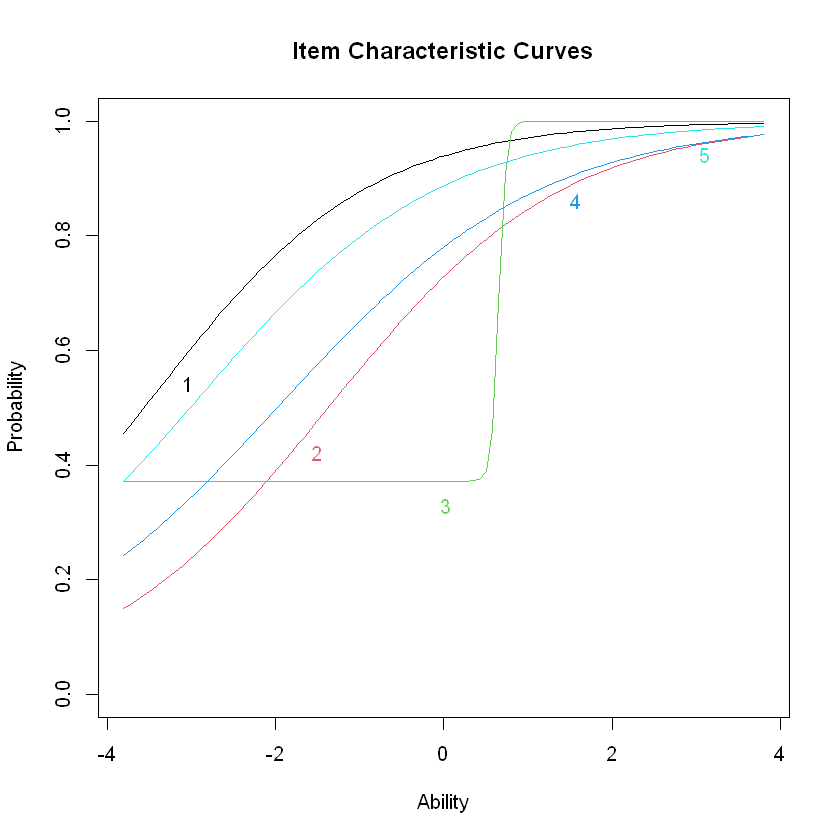

In [43]:
plot(IRTmodel2, type = "ICC")

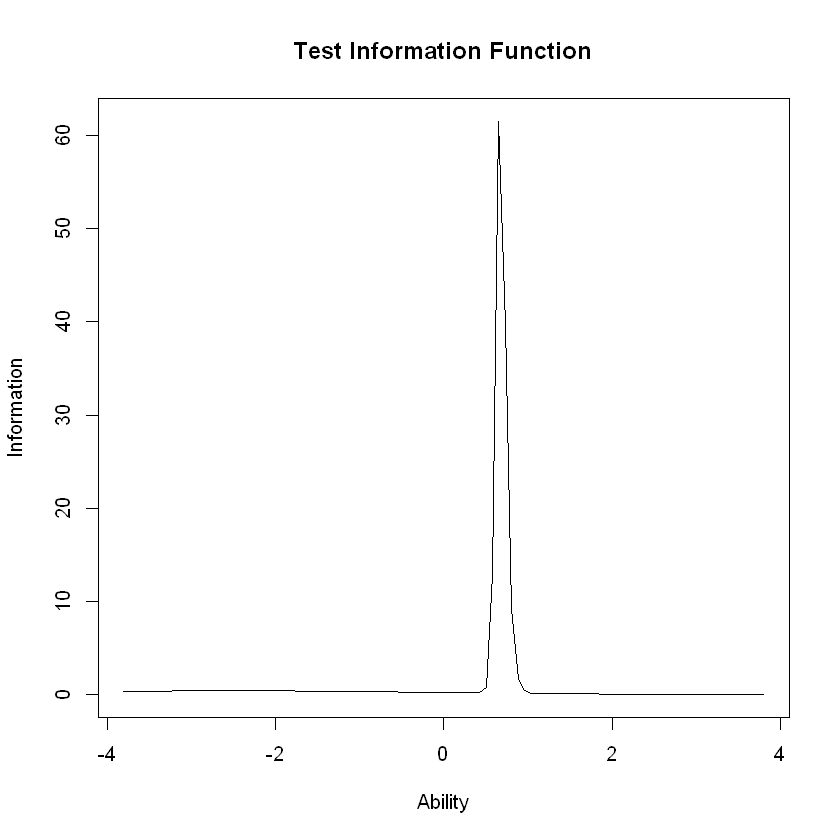

In [44]:
plot(IRTmodel2, type = "IIC", item = 0 )

In [45]:
factor.scores(IRTmodel2)


Call:
tpm(data = LSAT, type = "latent.trait", IRT.param = TRUE)

Scoring Method: Empirical Bayes

Factor-Scores for observed response patterns:
   Item 1 Item 2 Item 3 Item 4 Item 5 Obs     Exp     z1 se.z1
1       0      0      0      0      0   3   1.772 -1.753 0.835
2       0      0      0      0      1   6   4.936 -1.268 0.847
3       0      0      0      1      0   2   2.363 -1.301 0.847
4       0      0      0      1      1  11   8.747 -0.799 0.863
5       0      0      1      0      0   1   1.064 -1.753 0.835
6       0      0      1      0      1   1   3.093 -1.268 0.847
7       0      0      1      1      0   3   1.474 -1.301 0.847
8       0      0      1      1      1   4   6.205 -0.799 0.863
9       0      1      0      0      0   1   1.615 -1.246 0.847
10      0      1      0      0      1   8   6.178 -0.743 0.864
11      0      1      0      1      1  16  14.251 -0.253 0.883
12      0      1      1      0      1   3   4.484 -0.743 0.864
13      0      1      1      1      

In [46]:
person.fit(IRTmodel2)


Person-Fit Statistics and P-values

Call:
tpm(data = LSAT, type = "latent.trait", IRT.param = TRUE)

Alternative: Inconsistent response pattern under the estimated model

   Item 1 Item 2 Item 3 Item 4 Item 5      L0      Lz Pr(<Lz)
1       0      0      0      0      0 -4.6189 -1.9921  0.0232
2       0      0      0      0      1 -4.3246 -1.5453  0.0611
3       0      0      0      1      0 -5.0192 -2.3544  0.0093
4       0      0      0      1      1 -4.2042 -1.4344  0.0757
5       0      0      1      0      0 -5.1407 -2.6974  0.0035
6       0      0      1      0      1 -4.8464 -2.1454   0.016
7       0      0      1      1      0 -5.5410 -2.9611  0.0015
8       0      0      1      1      1 -4.7260 -1.9566  0.0252
9       0      1      0      0      0 -5.4681 -2.8503  0.0022
10      0      1      0      0      1 -4.5871 -1.8185  0.0345
11      0      1      0      1      1 -3.8825 -1.2351  0.1084
12      0      1      1      0      1 -5.1089 -2.3330  0.0098
13      0      1      

In [47]:
item.fit(IRTmodel2)


Item-Fit Statistics and P-values

Call:
tpm(data = LSAT, type = "latent.trait", IRT.param = TRUE)

Alternative: Items do not fit the model
Ability Categories: 10

             X^2 Pr(>X^2)
Item 1  476.5754  <0.0001
Item 2  725.0109  <0.0001
Item 3 2638.8392  <0.0001
Item 4  520.2216  <0.0001
Item 5  337.4389  <0.0001



In [48]:
#===ANOVA IRT table (comparison between models) ====#===========

#anova(IRTmodel, IRTmodel2)
anova(model, IRTmodel2)
## NOTE : The comparison between two or more models will only be valid if they are fitted to the same dataset. 

Warning message in anova.rasch(model, IRTmodel2):
"either the two models are not nested or the model represented by 'object2' fell on a local maxima.
"



 Likelihood Ratio Table
              AIC     BIC  log.Lik   LRT df p.value
model     4945.88 4975.32 -2466.94                 
IRTmodel2 4964.86 5038.48 -2467.43 -0.98  9       1
